<a href="https://colab.research.google.com/github/AntonioFuziy/DNA_mutation_detector/blob/master/RelatorioFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !nvcc -arch=sm_37 -std=c++14 main.cu -o main

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
# !./main < dna.seq

Tempo para calculo - levou - 34616 milisegundos
Score: 200


In [ ]:
# !g++ -Wall -O3 exaustive_search.cpp -o exaustive_search

In [ ]:
# !g++ -g -Wall -fopenmp parallel_exaustive_search.cpp -o parallel_exaustive_search

In [ ]:
# !./exaustive_search < dna20.seq

A size: 20
B size: 20

A: T-GAAGAAAA-TAGAT-CAG
B: TGA-A-C-GTAGAAT-GC--

Score: 37


In [ ]:
# !./parallel_exaustive_search < dna20.seq

A size: 20
B size: 20

A: T-GAAGAAAA-TAGAT-CAG
B: TGA-A-C-GTAGAAT-GC--

Score: 21


In [ ]:
!python3 ./dna_sequences/sequence_generator.py

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import subprocess
plt.style.use("ggplot")

In [ ]:
algorithms = [
    "/content/exaustive_search",
    "/content/parallel_exaustive_search",
    "/content/main"
]

input_directory = "dna_sequences/all_sequences"

In [ ]:
def roda_com_entrada(executavel, algorithm):
  with open(algorithm) as f:
    start = time.perf_counter()
    proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()
  return end-start

In [ ]:
def generate_time(algorithm, directory):
    tempos_busca = []
    dir_list = os.listdir(directory)
    for f in dir_list:
        tempos_busca.append(roda_com_entrada(algorithm,f'{directory}/{f}'))
    return tempos_busca, dir_list

In [ ]:
def generate_length(directory, dir_list):
    n = []
    m = []
    for file in dir_list:
        with open(f'{directory}/{file}') as f :
            text_splitted = f.read().splitlines()
        n.append(text_splitted[0])
        m.append(text_splitted[1])
    n = [int(i) for i in n]
    m = [int(j) for j in m]
    return n, m

In [ ]:
tempos_exaustiva_sequencial, dir_exaustiva_sequencial = generate_time(algorithms[0], input_directory)
n_exaustiva_sequencial, m_exaustiva_sequencial = generate_length(input_directory, dir_exaustiva_sequencial)

tempos_exaustiva_parallel, dir_exaustiva_parallel  = generate_time(algorithms[1], input_directory)
n_exaustiva_parallel, m_exaustiva_parallel = generate_length(input_directory, dir_exaustiva_parallel)

tempos_exaustiva_gpu, dir_exaustiva_gpu  = generate_time(algorithms[2], input_directory)
n_exaustiva_gpu, m_exaustiva_gpu = generate_length(input_directory, dir_exaustiva_gpu)

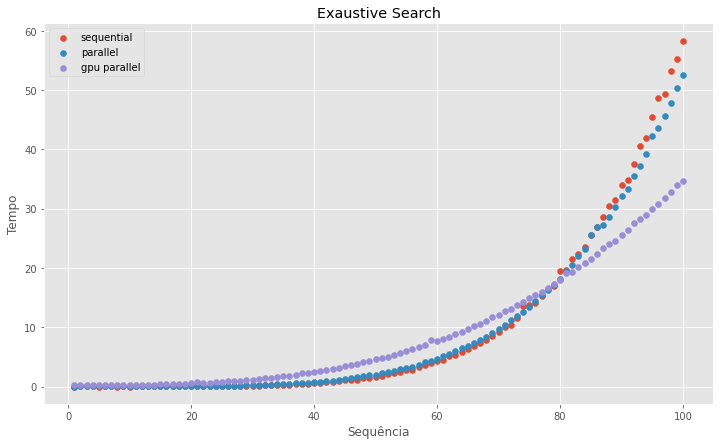

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(n_exaustiva_sequencial, tempos_exaustiva_sequencial, label="sequential")
plt.scatter(n_exaustiva_parallel, tempos_exaustiva_parallel, label="parallel")
plt.scatter(n_exaustiva_gpu, tempos_exaustiva_gpu, label="gpu parallel")
plt.title("Exaustive Search")
plt.xlabel('Sequência')
plt.ylabel("Tempo")
plt.legend()

plt.show()